<a href="https://colab.research.google.com/github/arnautoleg/Strajescu/blob/main/Strajescu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Baza upload


In [57]:
import pandas as pd

In [58]:
df=pd.read_csv('/content/Formular fără titlu.csv')

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 36 columns):
 #   Column                                                                                                                                                                              Non-Null Count  Dtype 
---  ------                                                                                                                                                                              --------------  ----- 
 0   Marcaj de timp                                                                                                                                                                      91 non-null     object
 1   Nume de utilizator                                                                                                                                                                  15 non-null     object
 2   1. Intervalul de vârstă în care vă încadrați                

In [60]:
df.drop(['Marcaj de timp', 'Nume de utilizator'], axis=1, inplace=True)
df.shape

(91, 34)

In [61]:
round(df['5. În ce regiune activați'].value_counts(normalize=True)*100, 1)

# Probabil este o limitarea. Chestionarul a fost anonim. Regiunile de nord si sud fiind pasivi,
# demonstrind competentele limitatea in domeniul dat

Mun.Chișinău    65.9
Centru          27.5
Nord             5.5
Sud              1.1
Name: 5. În ce regiune activați, dtype: float64

In [62]:
for el in df.columns:
  print('_______________')
  print(round(df[el].value_counts(normalize=True)*100, 1))


_______________
41-50 ani       34.1
31-40 ani       27.5
51-60 ani       27.5
Peste 60 ani     7.7
Sub 30 ani       3.3
Name: 1. Intervalul de vârstă în care vă încadrați, dtype: float64
_______________
Peste 20 ani      57.1
11-20 ani         29.7
Până la 10 ani    13.2
Name: 2. Ce stagiu de muncă aveți, dtype: float64
_______________
Masculin    54.9
Feminin     45.1
Name: 3. Genul, dtype: float64
_______________
Stat      93.4
Privat     6.6
Name: 4. Instituție medicală în care activați, dtype: float64
_______________
Mun.Chișinău    65.9
Centru          27.5
Nord             5.5
Sud              1.1
Name: 5. În ce regiune activați, dtype: float64
_______________
Mai mult pozitivă    92.3
Neutră                5.5
Mai mult negativă     2.2
Name: 6. Care este atitutdinea Dvs față de chirurgie de o zi, dtype: float64
_______________
Frecvent           50.5
Foarte frecvent    25.3
Uneori             15.4
Niciodată           6.6
Foarte rar          2.2
Name: 7. Cât de des se aplică chi

In [63]:
#df['8. Ce părere aveți despre chirurgia de o zi?\n(Selectați răspunsurile care se aplică)']

df[' 8. Ce părere aveți despre chirurgia de o zi?\n(Selectați răspunsurile care se aplică)'].value_counts()



Este o opțiune acceptabilă în cazul unei patologii chirurgicale acceptabile anumitor criterii                                                                                                                                                                                                        30
Este o opțiune acceptabilă în cazul unei patologii chirurgicale acceptabile anumitor criterii;Este o opțiune acceptabilă doar la pacienții fără patologii concomitente;Este o opțiune acceptabilă doar în afecțiuni chirurgicale minore                                                               8
Este o opțiune acceptabilă doar la pacienții fără patologii concomitente                                                                                                                                                                                                                              7
Este o opțiune acceptabilă doar în afecțiuni chirurgicale minore                                                

In [64]:

# 'Vârstă', 'Stagiu', 'Genul', 'Instituție_tip', 'Regiune', 'Atitudine',
# 'Frecvența', 'Părerea', 'Experiența_Nivel', 'Experiența_Contribuția',
# 'Experiența_Cunoașterea', 'Experiența_Tehnologii', 'Experiența_Dezvoltarea',
# 'Serviciul_beneficiu_social', 'Serviciul_beneficiu_econimic', 'Rata', 'Rezolvarea_complicații',
# 'Rezolvarea_complicații_72_ore', 'Serviciul_obstacole', 'Serviciul_obstacole_salariul',
# 'Serviciul_obstacole_cadre', 'Serviciul_obstacole_utilaj', 'Conlucrarea', 'Prioretizare',
# 'Viziunea_MS', 'Favorizarea_CNAM', 'Politici_DGAMS_UTAG', 'Serviciul_CAN', 'Diferența',
# 'Reviziurea_lista', 'Lista_consultații', 'Lista_ambulator', 'Rotația_patului', 'Beneficii'


In [65]:
df.columns

Index(['1. Intervalul de vârstă în care vă încadrați',
       '2. Ce stagiu de muncă aveți', '3. Genul',
       '4. Instituție medicală în care activați', '5. În ce regiune activați',
       '6. Care este atitutdinea Dvs față de chirurgie de o zi',
       '7. Cât de des se aplică chirurgia de o zi în instituția Dvs',
       ' 8. Ce părere aveți despre chirurgia de o zi?\n(Selectați răspunsurile care se aplică)',
       '9. Experiența managerială [Care este nivelul de experiență managerială în organizarea chirurgiei de o zi?]',
       '9. Experiența managerială [Contribuția de dezvoltare a serviciului ”chirurgie de o zi” în instituia Dvs]',
       '9. Experiența managerială [În ce măsură cunoașteți conceptul ”chirurgie de o zi”]',
       '9. Experiența managerială [Tehnologiile medicale operaționale sunt în creștere pentru a fortifica ”chirurgia de o zi”]',
       '9. Experiența managerială [Considerați că serviciul ”chirurgie de o zi” este un substrat de edzvoltare a întregului spital]

In [66]:
df.columns = ['Vârstă', 'Stagiu', 'Genul', 'Instituție_tip', 'Regiune', 'Atitudine',
'Frecvența', 'Părerea', 'Experiența_Nivel', 'Experiența_Contribuția',
'Experiența_Cunoașterea', 'Experiența_Tehnologii', 'Experiența_Dezvoltarea',
'Serviciul_beneficiu_social', 'Serviciul_beneficiu_econimic', 'Rata', 'Rezolvarea_complicații',
'Rezolvarea_complicații_72_ore', 'Serviciul_obstacole', 'Serviciul_obstacole_salariul',
'Serviciul_obstacole_cadre', 'Serviciul_obstacole_utilaj', 'Conlucrarea', 'Prioretizare',
'Viziunea_MS', 'Favorizarea_CNAM', 'Politici_DGAMS_UTAG', 'Serviciul_CAN', 'Diferența',
'Reviziurea_lista', 'Lista_consultații', 'Lista_ambulator', 'Rotația_patului', 'Beneficii']


In [67]:
df

,Vârstă,Stagiu,Genul,Instituție_tip,Regiune,Atitudine,Frecvența,Părerea,Experiența_Nivel,Experiența_Contribuția,...,Viziunea_MS,Favorizarea_CNAM,Politici_DGAMS_UTAG,Serviciul_CAN,Diferența,Reviziurea_lista,Lista_consultații,Lista_ambulator,Rotația_patului,Beneficii
0,31-40 ani,Până la 10 ani,Masculin,Stat,Mun.Chișinău,Mai mult pozitivă,Frecvent,Este o opțiune acceptabilă în cazul unei patol...,Mediu,Mediu,...,Nu,Da,Da,Da,Da,Da,Nu,Da,Da,Da
1,41-50 ani,Peste 20 ani,Feminin,Stat,Centru,Mai mult pozitivă,Frecvent,Este o opțiune acceptabilă în cazul unei patol...,Mediu,Mic,...,Probabil,Da,Puțin probabil,Da,Da,Poate fi modificată odată la 5 ani,Tangențial,Aceasta nu are nici o importanță,Da,Da
2,31-40 ani,Până la 10 ani,Feminin,Stat,Centru,Mai mult pozitivă,Frecvent,Este o opțiune acceptabilă în cazul unei patol...,Mediu,Mediu,...,Nu,Este contractată la același nivel cu alte cazuri,Puțin probabil,Puțin probabil,Sunt doua servicii diverite,Poate fi modificată odată la 5 ani,Nu,Da,Da,Da
3,31-40 ani,11-20 ani,Feminin,Stat,Mun.Chișinău,Mai mult pozitivă,Uneori,Este o opțiune acceptabilă în cazul unei patol...,Mare,Mare,...,Probabil,Nu,Puțin probabil,Puțin probabil,Este același serviciu,Da,Da,Da,Aceasta are o importanță majoră,Da
4,31-40 ani,11-20 ani,Feminin,Stat,Centru,Mai mult pozitivă,Foarte frecvent,Este o opțiune acceptabilă în cazul unei patol...,Mare,Mare,...,Da,Nu,Puțin probabil,Puțin probabil,Da,Da,Da,Da,Da,Da
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,Peste 60 ani,Peste 20 ani,Masculin,Stat,Mun.Chișinău,Mai mult pozitivă,Frecvent,Este o opțiune acceptabilă în cazul unei patol...,Mare,Substanțial,...,Probabil,Nu,Puțin probabil,Puțin probabil,Da,Da,Nu,Nu,Da,Da
87,51-60 ani,Peste 20 ani,Feminin,Stat,Mun.Chișinău,Mai mult pozitivă,Frecvent,Este o opțiune acceptabilă în cazul unei patol...,Substanțial,Substanțial,...,Da,Da,Puțin probabil,Puțin probabil,Da,Da,Nu,Nu,Da,Da
88,41-50 ani,Peste 20 ani,Masculin,Privat,Mun.Chișinău,Mai mult pozitivă,Foarte frecvent,Este o opțiune acceptabilă în cazul unei patol...,Mare,Substanțial,...,Probabil,Nu,Nu au nici o viziune asupra acestui serviciu,Puțin probabil,Da,Poate fi modificată odată la 3 ani,Da,Da,Da,Da
89,51-60 ani,Peste 20 ani,Masculin,Stat,Mun.Chișinău,Mai mult pozitivă,Foarte rar,Trebuie acordată cu precauție,Mic,Mic,...,Probabil,Este contractată la același nivel cu alte cazuri,Puțin probabil,Puțin probabil,Sunt servicii care urmăresc scopuri diferite,Da,Viziuni superficiale,Nu,Da,Da


In [68]:
df.Vârstă = df.Vârstă.replace(['Peste 60 ani', 'Sub 30 ani'], ['>60 ani', '<=30 ani'])
df.Stagiu = df.Stagiu.replace(['Peste 20 ani', 'Până la 10 ani'], ['>20 ani', '<=10 ani'])
df.Atitudine = df.Atitudine.replace(['Mai mult pozitivă', 'Mai mult negativă'], ['Pozitivă', 'Negativă'])
df.Serviciul_beneficiu_social = df.Serviciul_beneficiu_social.replace(['Ne însemnat'], ['Mic'])
df.Serviciul_beneficiu_econimic = df.Serviciul_beneficiu_econimic.replace(['Ne însemnat'], ['Mic'])
df.Rata = df.Rata.replace(['Până la 5%', 'Mai mult de 20%'], ['<5%', '>20%'])
df.Rezolvarea_complicații = df.Rezolvarea_complicații.replace(['Instituția implicată', 'Chirurg din policlinica de sector', 'AMT de sector', 'Medic de familie'],
                                                              ['Spitalul', 'Policlinica', 'AMT', 'MF'])
df.Rezolvarea_complicații_72_ore = df.Rezolvarea_complicații_72_ore.replace(['Depinde de numărul bolnavilor operați zilnic', 'Nu este necesar', 'Obligator', 'Responsabil devine AMT de sector'],
                                                                            ['Incarcatura', 'Neobligator', 'Obligator', 'AMT'])

df.Prioretizare = df.Prioretizare.replace(['Nu este prioritizată', 'Nu este discutată în general', 'În mare măsură'],
                                          ['Nu', 'Nu este discutata', 'Da'])
df.Viziunea_MS = df.Viziunea_MS.replace(['Nu are nici o viziune asupra acestui serviciu'],
                                          ['Nu_general'])

df.Favorizarea_CNAM = df.Favorizarea_CNAM.replace(['Este contractată la același nivel cu alte cazuri'],
                                                  ['Contractată_similar'])

df.Politici_DGAMS_UTAG = df.Politici_DGAMS_UTAG.replace(['Nu au nici o viziune asupra acestui serviciu'],
                                                        ['Viziunea_lipseste'])

df.Serviciul_CAN = df.Serviciul_CAN.replace(['Nu au nici o viziune asupra acestui serviciu'],
                                                        ['Viziunea_lipseste'])

df.Diferența = df.Diferența.replace(['Sunt doua servicii diverite', 'Sunt servicii care urmăresc scopuri diferite', 'Este același serviciu'],
                                    ['Servicii_diverite', 'Servicii_complementare', 'Servicii_similare'])

df.Reviziurea_lista = df.Reviziurea_lista.replace(['Poate fi modificată odată la 3 ani', 'Poate fi modificată odată la 5 ani'],
                                                  ['3 ani', '5 ani'])


'Poate fi modificată odată la 3 ani', 'Poate fi modificată odată la 5 ani'







('Poate fi modificată odată la 3 ani', 'Poate fi modificată odată la 5 ani')

In [69]:
for el in df.columns:
  print('_______________')
  print(round(df[el].value_counts(normalize=True)*100, 1))


_______________
41-50 ani    34.1
31-40 ani    27.5
51-60 ani    27.5
>60 ani       7.7
<=30 ani      3.3
Name: Vârstă, dtype: float64
_______________
>20 ani      57.1
11-20 ani    29.7
<=10 ani     13.2
Name: Stagiu, dtype: float64
_______________
Masculin    54.9
Feminin     45.1
Name: Genul, dtype: float64
_______________
Stat      93.4
Privat     6.6
Name: Instituție_tip, dtype: float64
_______________
Mun.Chișinău    65.9
Centru          27.5
Nord             5.5
Sud              1.1
Name: Regiune, dtype: float64
_______________
Pozitivă    92.3
Neutră       5.5
Negativă     2.2
Name: Atitudine, dtype: float64
_______________
Frecvent           50.5
Foarte frecvent    25.3
Uneori             15.4
Niciodată           6.6
Foarte rar          2.2
Name: Frecvența, dtype: float64
_______________
Este o opțiune acceptabilă în cazul unei patologii chirurgicale acceptabile anumitor criterii                                                                                                   

# Boxplot cu 95%CI

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.stats.proportion import proportion_confint

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.stats.proportion import proportion_confint

def bar_plot_cat (el, df):

  # Calculate percentage for each category
  percentage_data = (df[el].value_counts(normalize=True, sort=False).sort_index() * 100).reset_index()
  percentage_data.columns = [el, 'Procente']

  # Calculate confidence intervals for each category
  ci_data = df[el].value_counts().apply(lambda x: proportion_confint(x, len(df), method='normal')).reset_index()
  ci_data.columns = [el, 'CI']

  # Unpack the tuple into separate columns for lower and upper bounds
  ci_data[['CI_Lower', 'CI_Upper']] = pd.DataFrame(ci_data['CI'].tolist(), index=ci_data.index)

  # Drop the original CI column
  ci_data = ci_data.drop(columns=['CI'])

  # Merge percentage and CI data
  merged_data = pd.merge(percentage_data, ci_data, on=el)

  # Create bar plot using seaborn
  plt.figure(figsize=(8, 6))
  sns.set(style="whitegrid")
  ax = sns.barplot(x=el, y='Procente', data=merged_data, palette="viridis")

  # Set y-axis range to be from 0 to 100
  ax.set_ylim(0, 100)


  # Add percentage and 95% confidence intervals as text annotations
  for i, row in merged_data.iterrows():
     percentage = row['Procente']
     lower_ci = row['CI_Lower'] * 100
     upper_ci = row['CI_Upper'] * 100
     if len(df[el].value_counts().index) <= 3:
      plt.text(i, percentage, f'{percentage:.1f}% [{lower_ci:.1f}, {upper_ci:.1f}]', ha='center', va='bottom', color='black')
     else:
      plt.text(i, percentage, f'{percentage:.1f}%\n [{lower_ci:.1f}, {upper_ci:.1f}]', ha='center', va='bottom', color='black')
  plt.title('Bar Plot Frecventele relative cu 95% IC')
  plt.show()
#“normal”, “agresti_coull”, “beta”, “wilson”, “binom_test”

<ipython-input-70-738aae75123f>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=el, y='Procente', data=merged_data, palette="viridis")


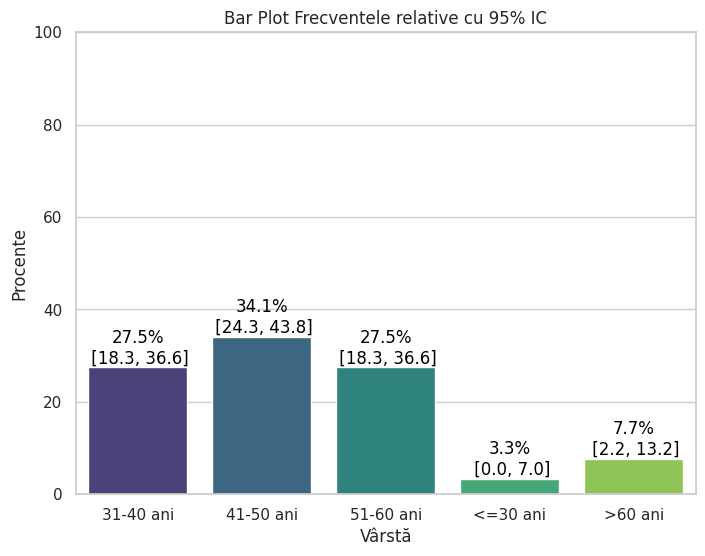

<ipython-input-70-738aae75123f>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=el, y='Procente', data=merged_data, palette="viridis")


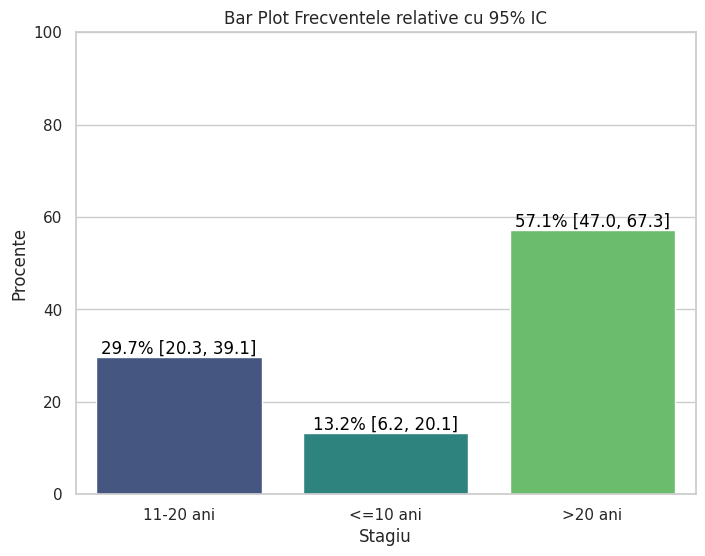

<ipython-input-70-738aae75123f>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=el, y='Procente', data=merged_data, palette="viridis")


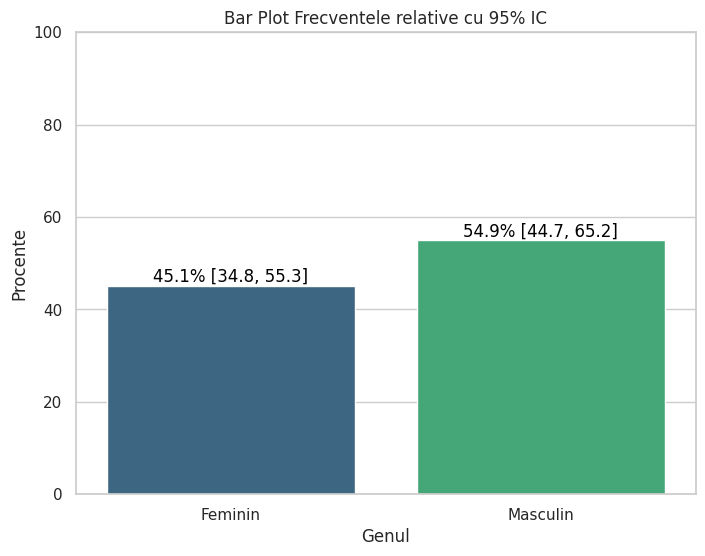

<ipython-input-70-738aae75123f>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=el, y='Procente', data=merged_data, palette="viridis")


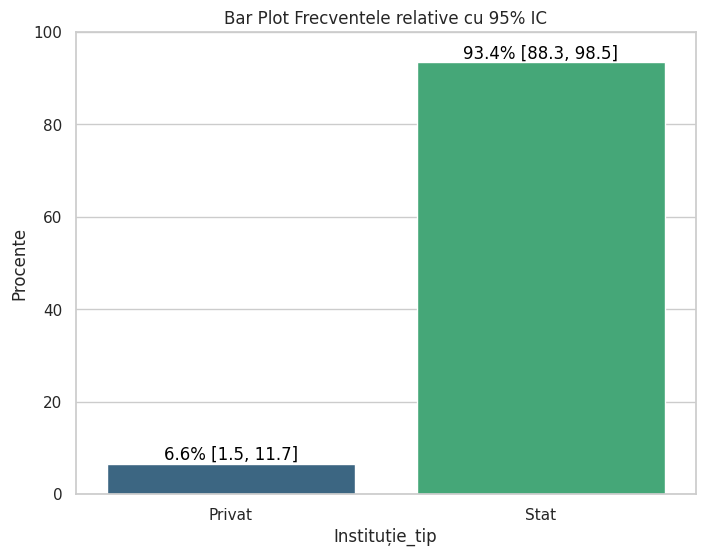

<ipython-input-70-738aae75123f>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=el, y='Procente', data=merged_data, palette="viridis")


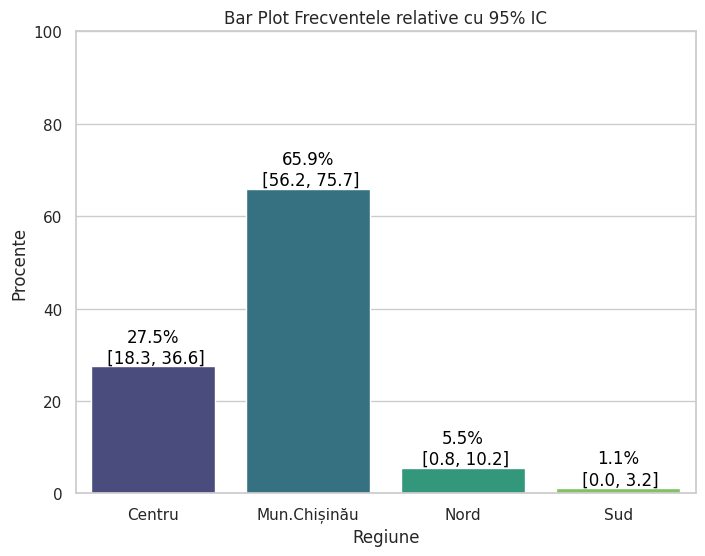

<ipython-input-70-738aae75123f>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=el, y='Procente', data=merged_data, palette="viridis")


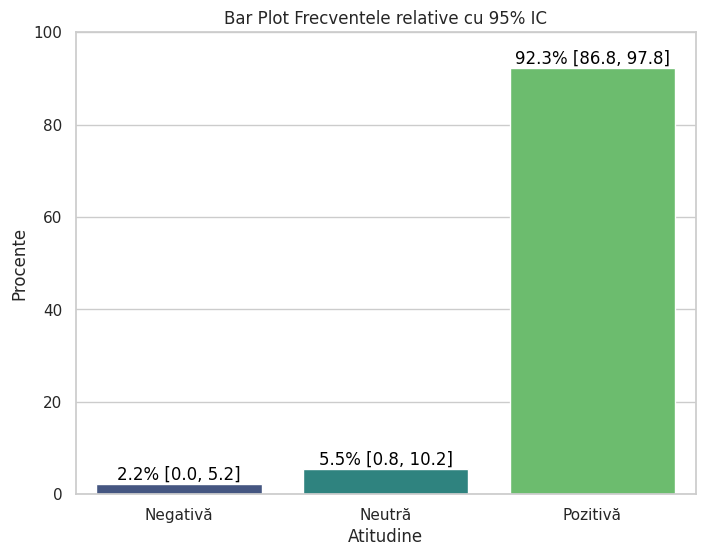

<ipython-input-70-738aae75123f>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=el, y='Procente', data=merged_data, palette="viridis")


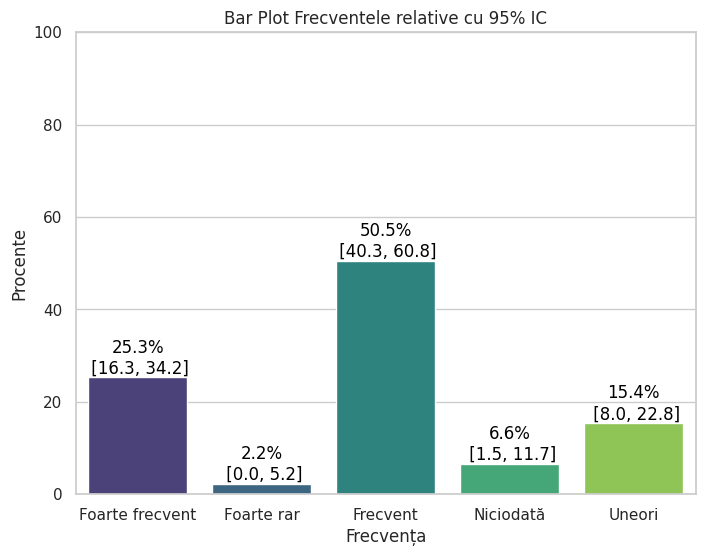

<ipython-input-70-738aae75123f>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=el, y='Procente', data=merged_data, palette="viridis")


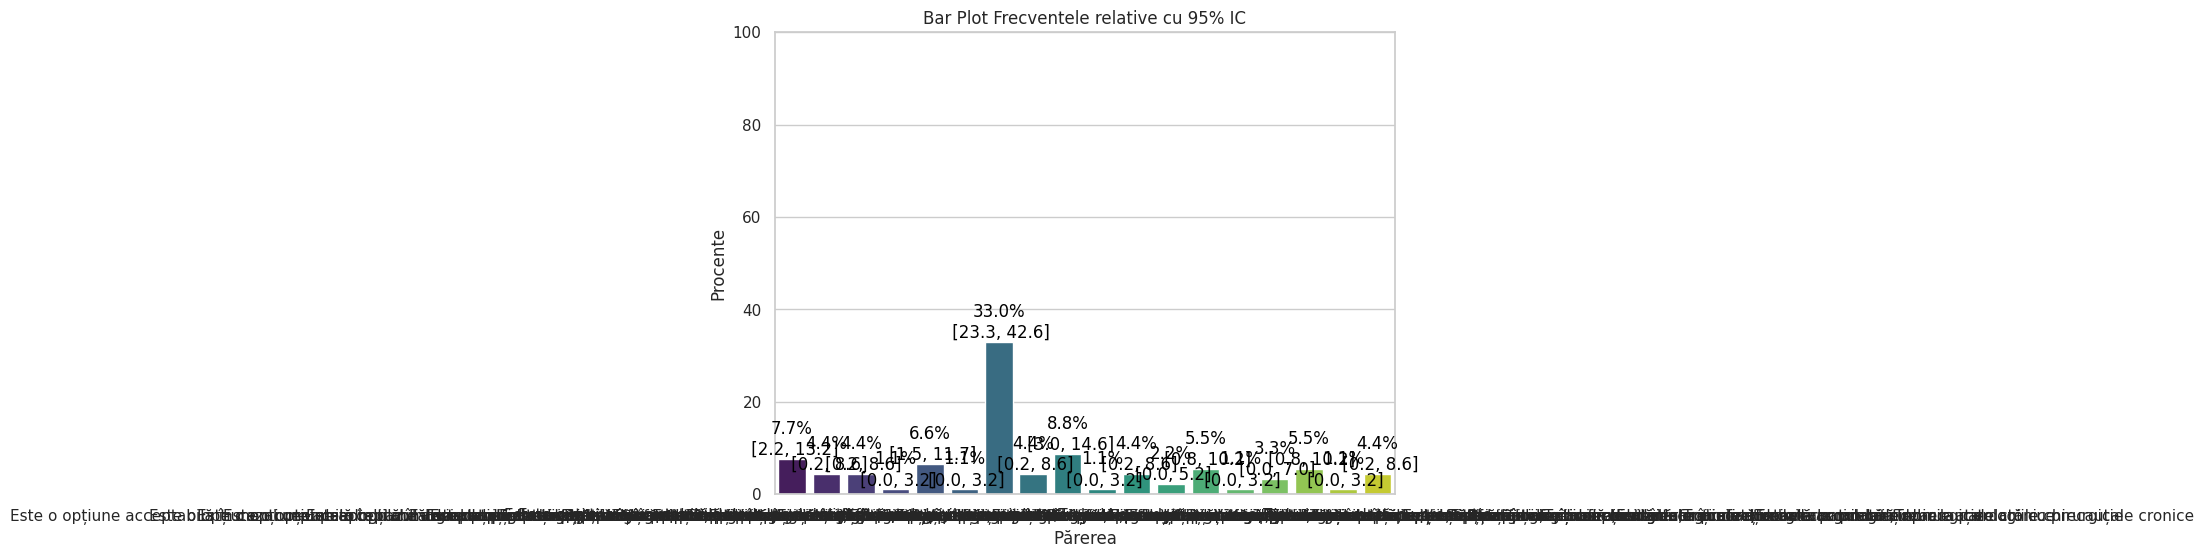

<ipython-input-70-738aae75123f>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=el, y='Procente', data=merged_data, palette="viridis")


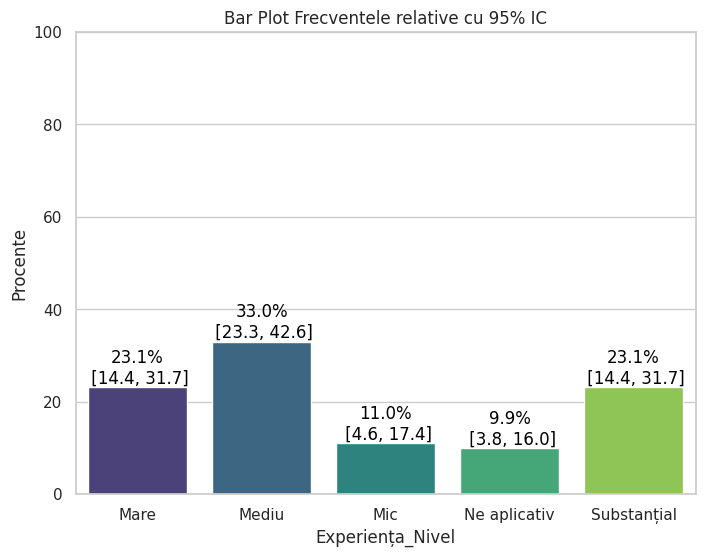

<ipython-input-70-738aae75123f>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=el, y='Procente', data=merged_data, palette="viridis")


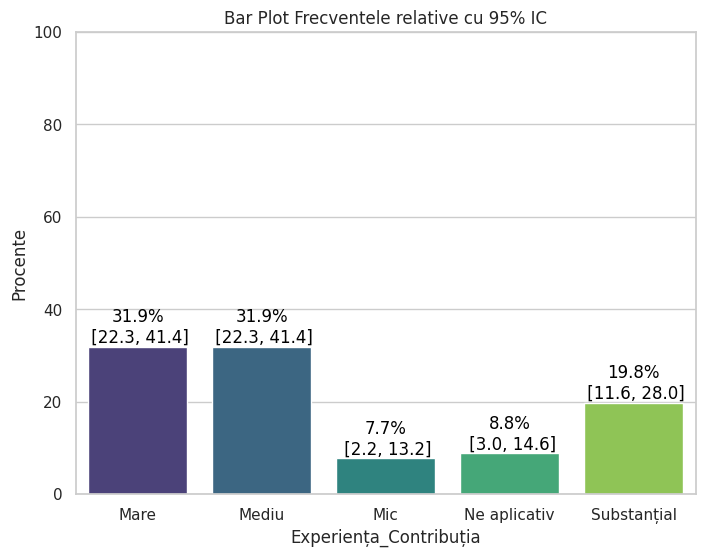

<ipython-input-70-738aae75123f>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=el, y='Procente', data=merged_data, palette="viridis")


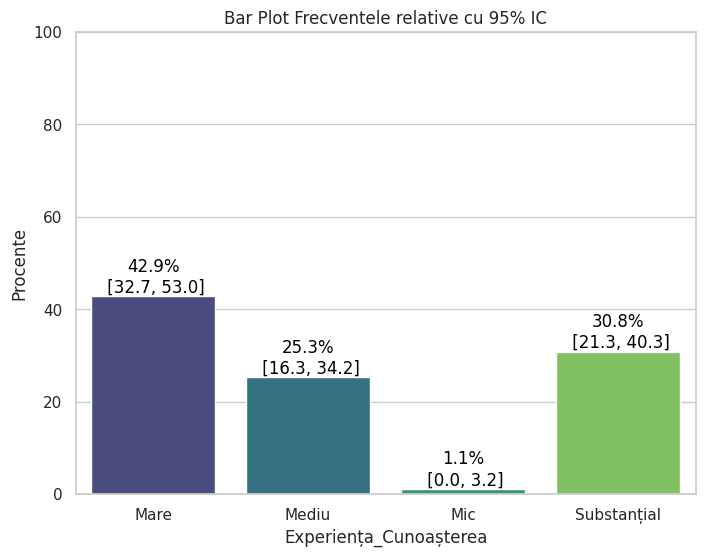

<ipython-input-70-738aae75123f>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=el, y='Procente', data=merged_data, palette="viridis")


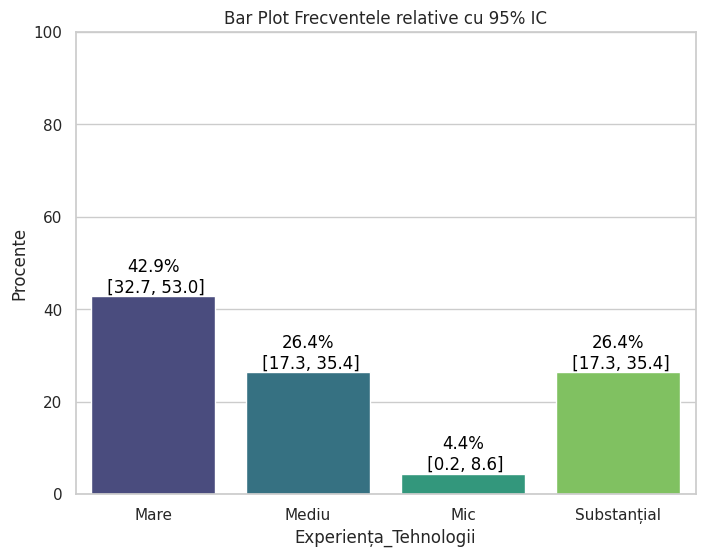

<ipython-input-70-738aae75123f>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=el, y='Procente', data=merged_data, palette="viridis")


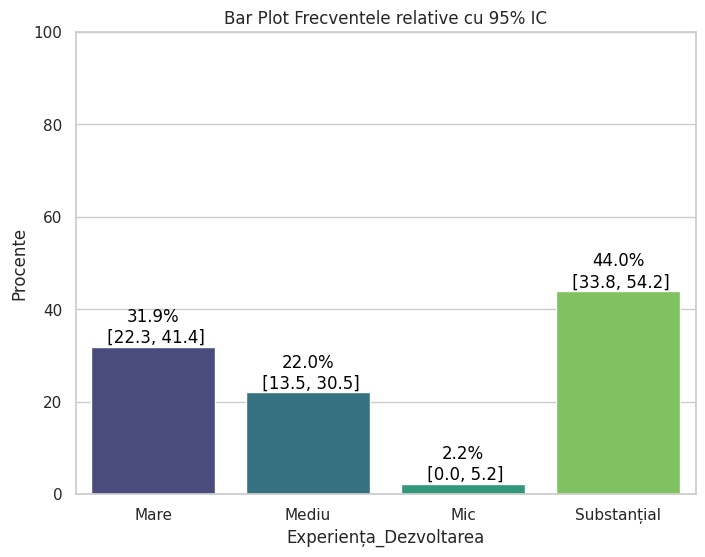

<ipython-input-70-738aae75123f>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=el, y='Procente', data=merged_data, palette="viridis")


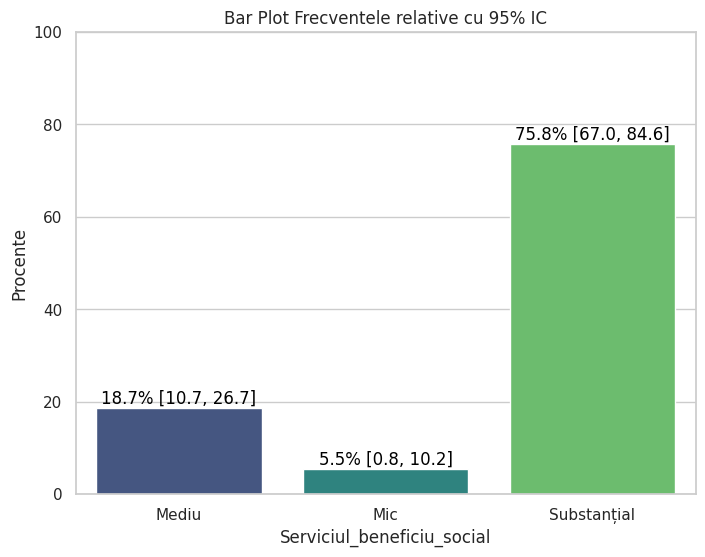

<ipython-input-70-738aae75123f>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=el, y='Procente', data=merged_data, palette="viridis")


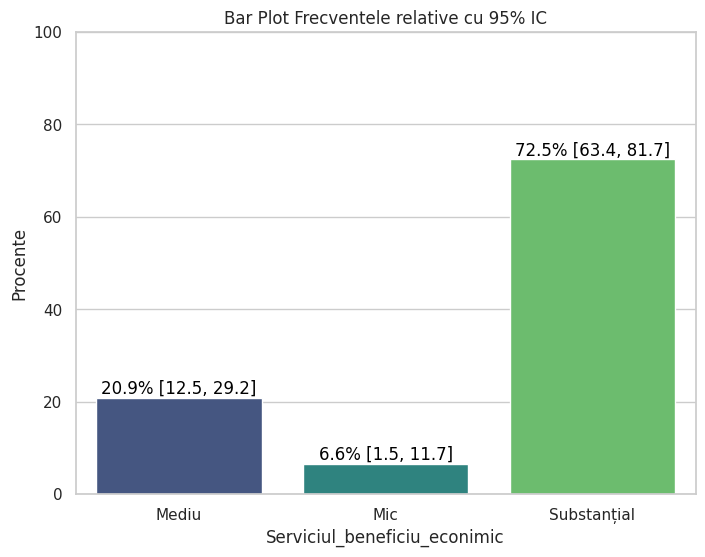

<ipython-input-70-738aae75123f>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=el, y='Procente', data=merged_data, palette="viridis")


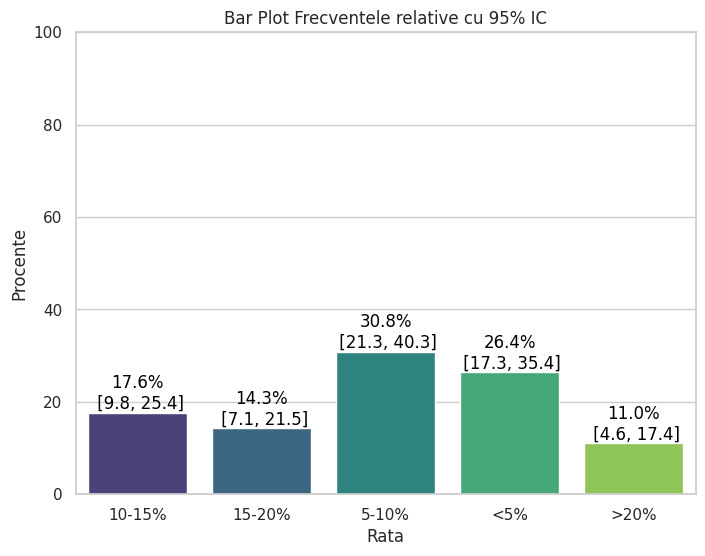

<ipython-input-70-738aae75123f>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=el, y='Procente', data=merged_data, palette="viridis")


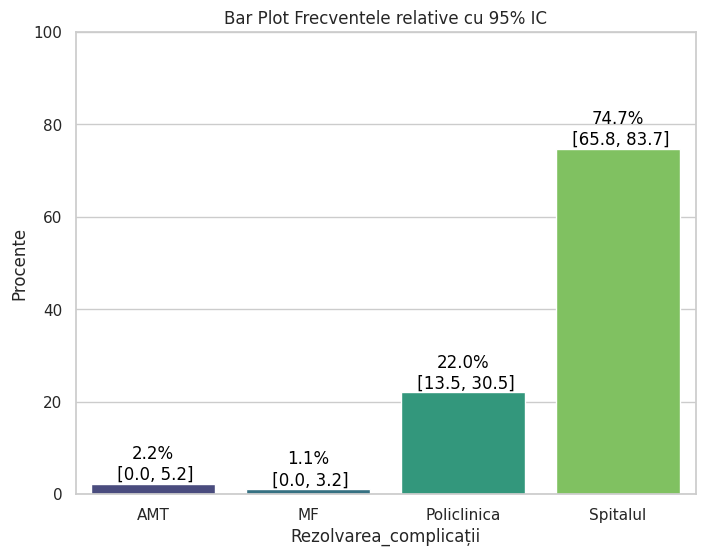

<ipython-input-70-738aae75123f>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=el, y='Procente', data=merged_data, palette="viridis")


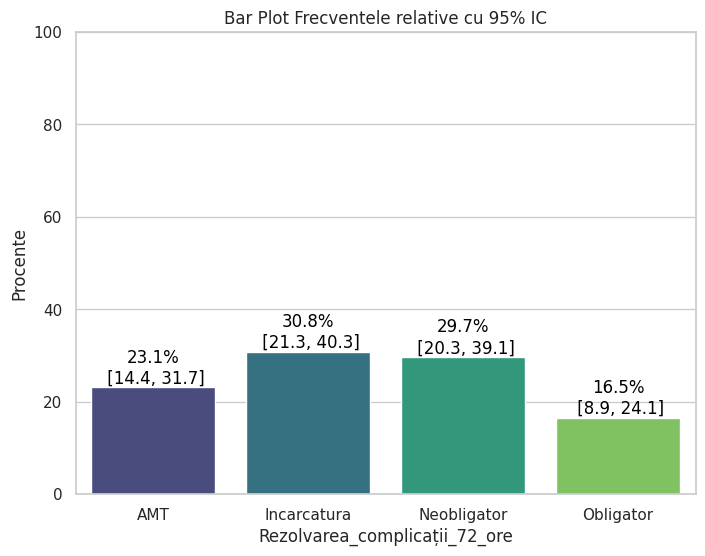

<ipython-input-70-738aae75123f>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=el, y='Procente', data=merged_data, palette="viridis")


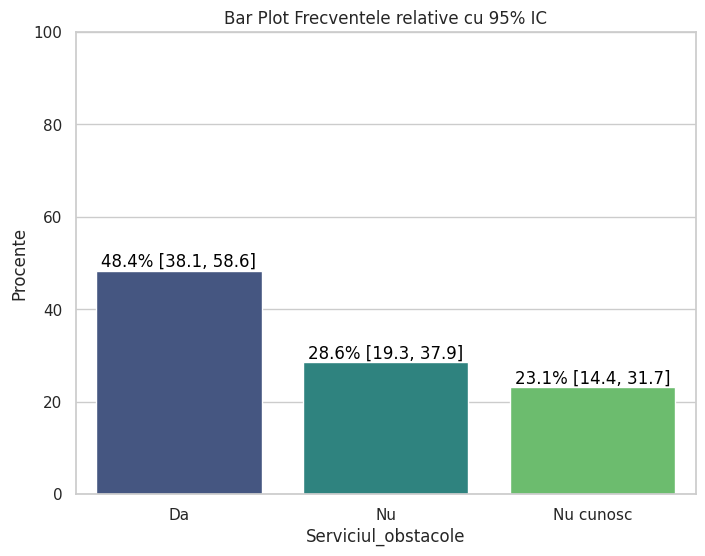

<ipython-input-70-738aae75123f>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=el, y='Procente', data=merged_data, palette="viridis")


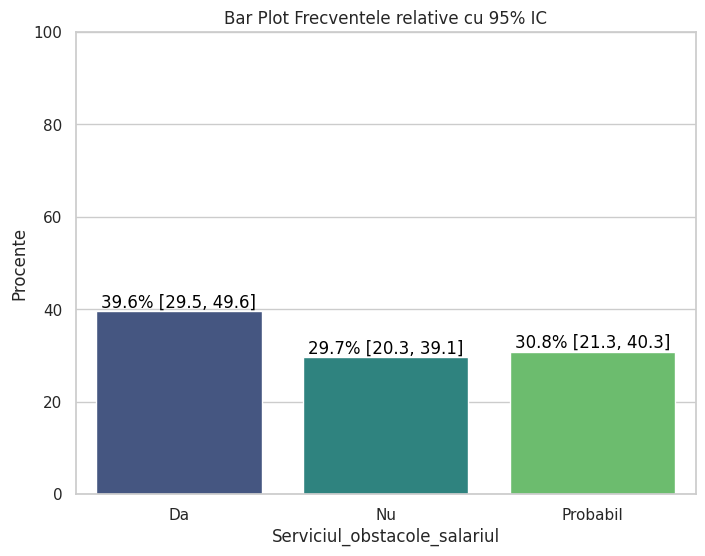

<ipython-input-70-738aae75123f>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=el, y='Procente', data=merged_data, palette="viridis")


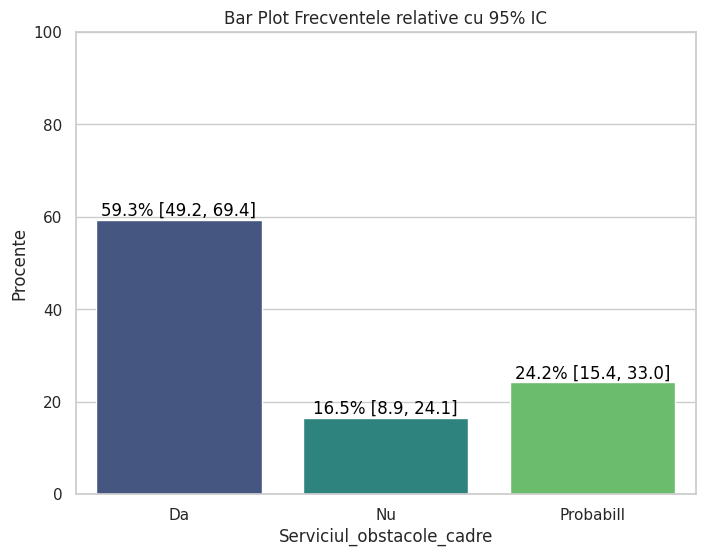

<ipython-input-70-738aae75123f>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=el, y='Procente', data=merged_data, palette="viridis")


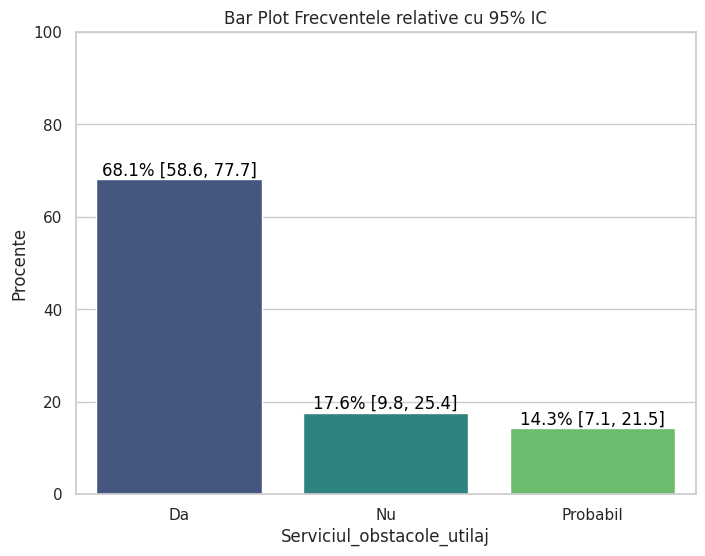

<ipython-input-70-738aae75123f>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=el, y='Procente', data=merged_data, palette="viridis")


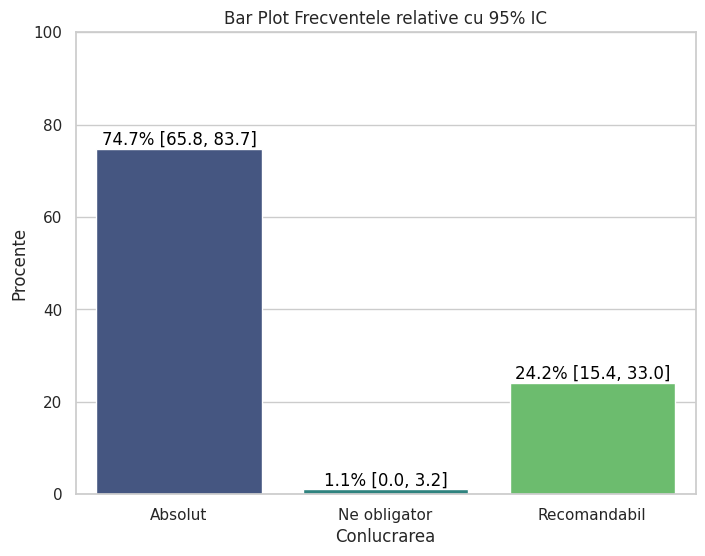

<ipython-input-70-738aae75123f>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=el, y='Procente', data=merged_data, palette="viridis")


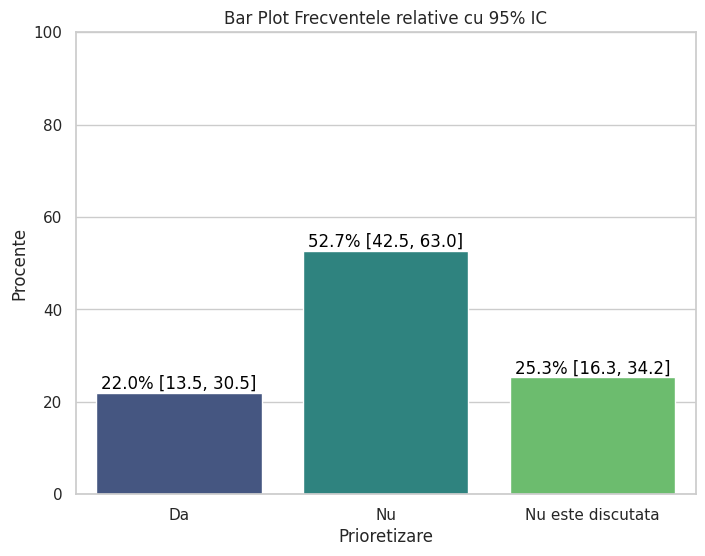

<ipython-input-70-738aae75123f>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=el, y='Procente', data=merged_data, palette="viridis")


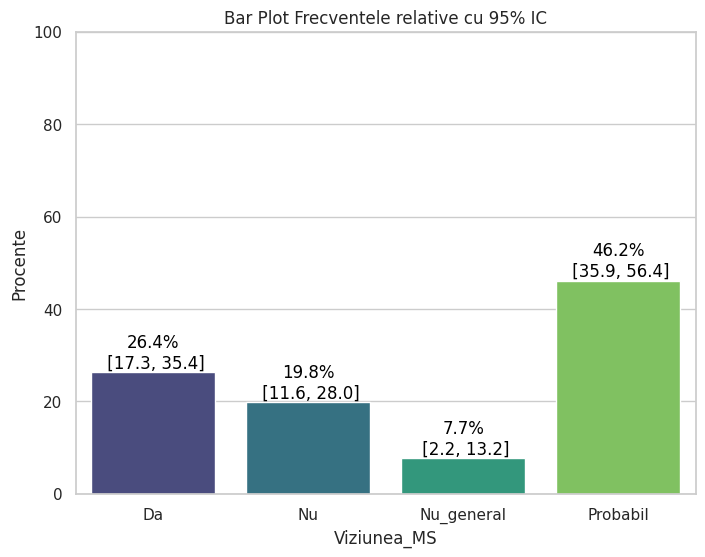

<ipython-input-70-738aae75123f>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=el, y='Procente', data=merged_data, palette="viridis")


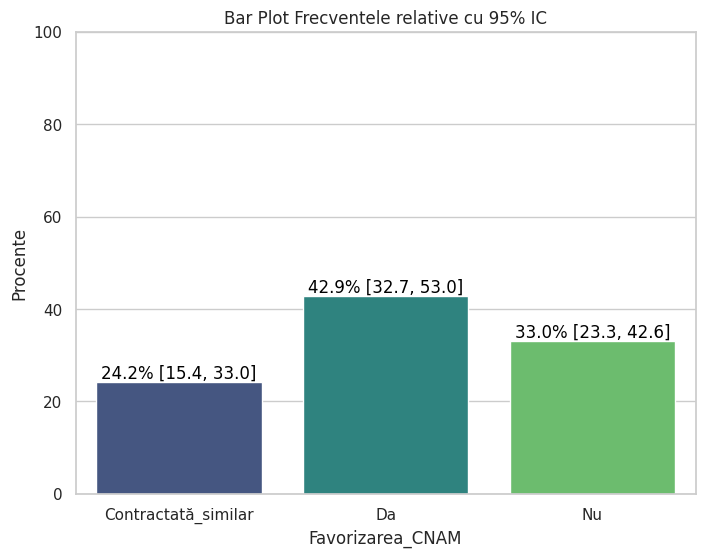

<ipython-input-70-738aae75123f>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=el, y='Procente', data=merged_data, palette="viridis")


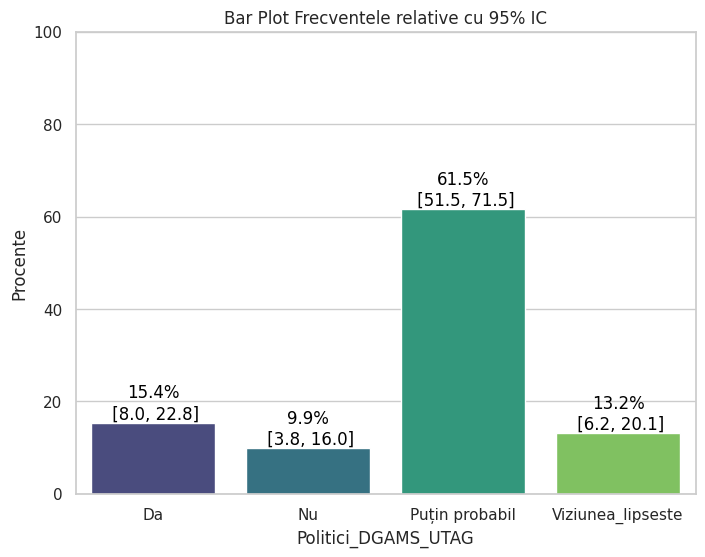

<ipython-input-70-738aae75123f>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=el, y='Procente', data=merged_data, palette="viridis")


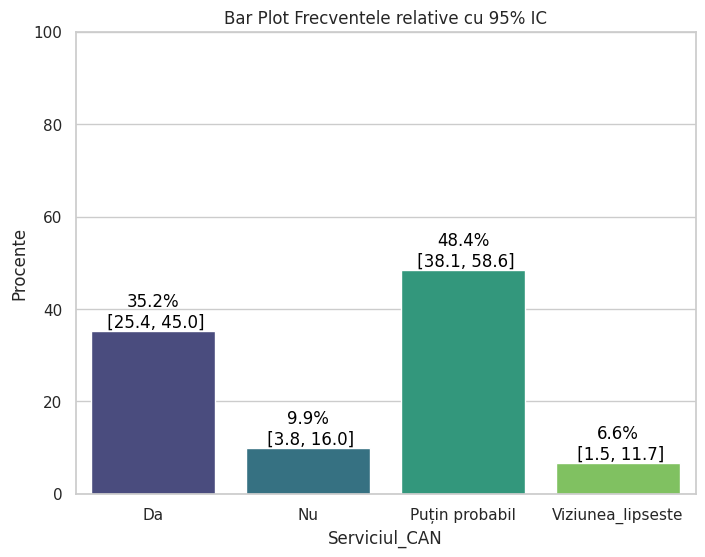

<ipython-input-70-738aae75123f>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=el, y='Procente', data=merged_data, palette="viridis")


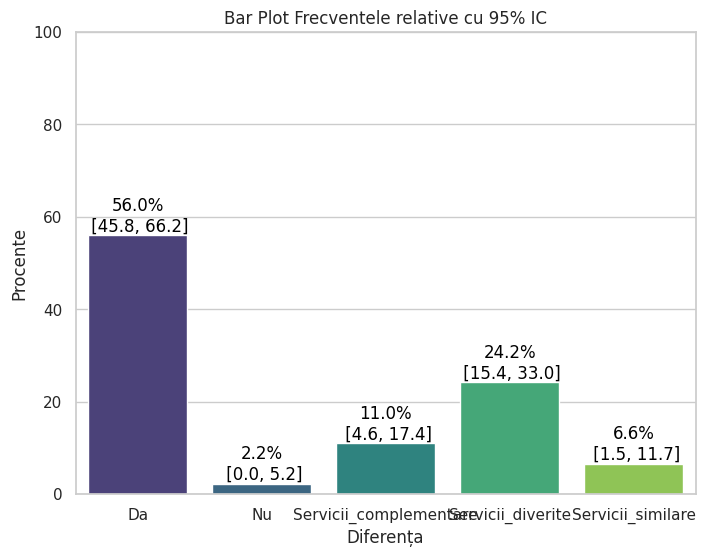

<ipython-input-70-738aae75123f>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=el, y='Procente', data=merged_data, palette="viridis")


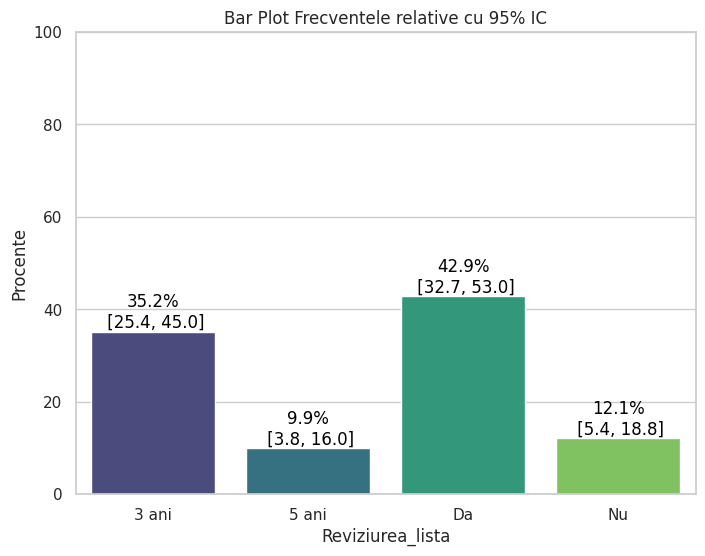

<ipython-input-70-738aae75123f>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=el, y='Procente', data=merged_data, palette="viridis")


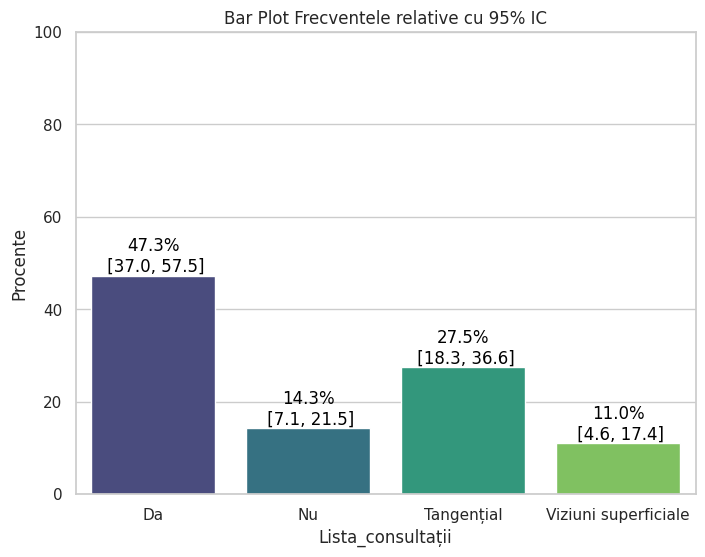

<ipython-input-70-738aae75123f>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=el, y='Procente', data=merged_data, palette="viridis")


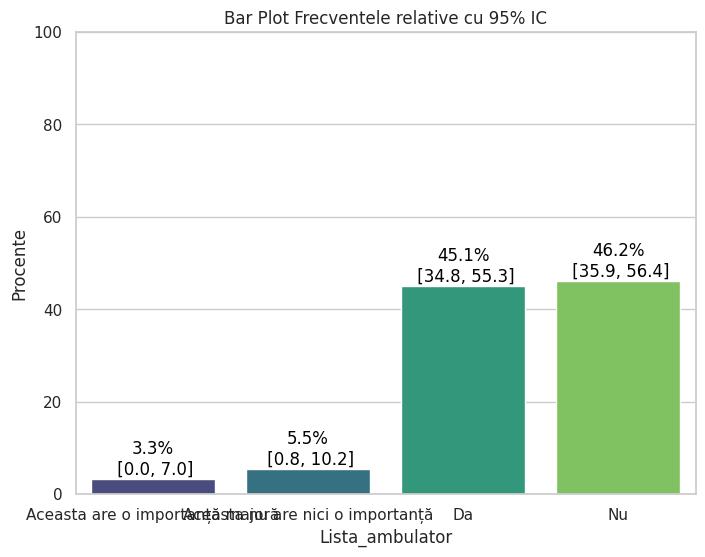

<ipython-input-70-738aae75123f>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=el, y='Procente', data=merged_data, palette="viridis")


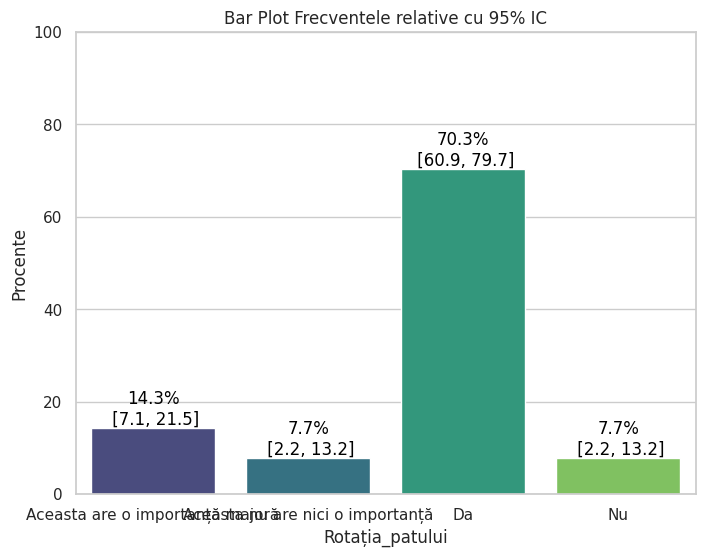

<ipython-input-70-738aae75123f>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=el, y='Procente', data=merged_data, palette="viridis")


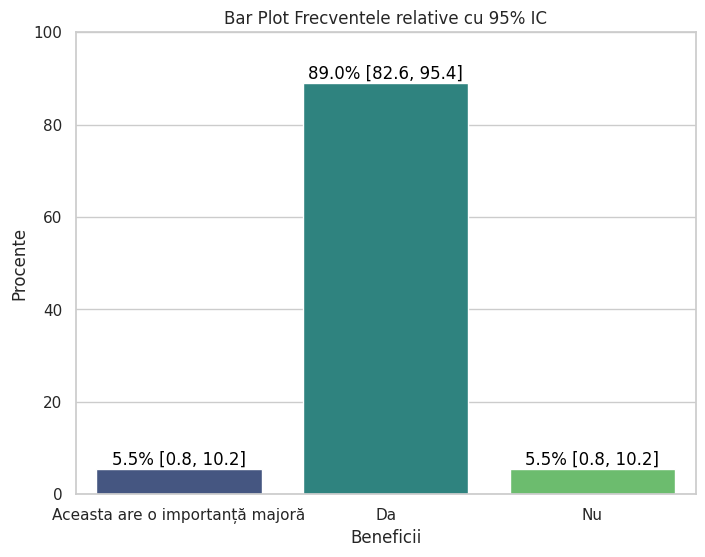

In [71]:
for el in df.columns:
  bar_plot_cat (el, df)